In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("cleaned_retail_data.csv")

df.head()


,date,store_id,store_name,city,product_id,product_name,category,units_sold,revenue
0,2023-01-01,S1,Central Mall Store,Mumbai,P1,Smartphone,Electronics,120,24000
1,2023-01-02,S1,Central Mall Store,Mumbai,P2,Headphones,Accessories,80,16000
2,2023-01-03,S2,City Center Store,Delhi,P1,Smartphone,Electronics,90,18000
3,2023-01-04,S2,City Center Store,Delhi,P3,Laptop,Electronics,60,30000
4,2023-01-05,S3,Metro Plaza Store,Bangalore,P2,Headphones,Accessories,110,22000


In [3]:
df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          20 non-null     object
 1   store_id      20 non-null     object
 2   store_name    20 non-null     object
 3   city          20 non-null     object
 4   product_id    20 non-null     object
 5   product_name  20 non-null     object
 6   category      20 non-null     object
 7   units_sold    20 non-null     int64 
 8   revenue       20 non-null     int64 
dtypes: int64(2), object(7)
memory usage: 1.5+ KB


,units_sold,revenue
count,20.000000,20.000000
mean,147.250000,41600.000000
std,52.452359,26521.887684
min,60.000000,16000.000000
25%,105.000000,27500.000000
50%,155.000000,34500.000000
75%,182.500000,42500.000000
max,240.000000,120000.000000


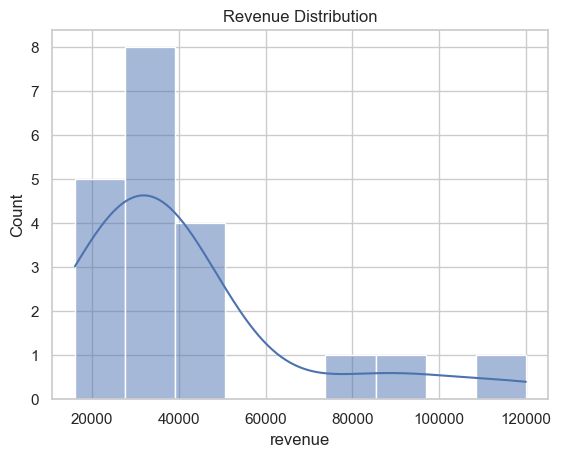

In [4]:
# UNIVARIATE ANALYSIS

sns.histplot(df['revenue'], kde=True)
plt.title("Revenue Distribution")
plt.show()


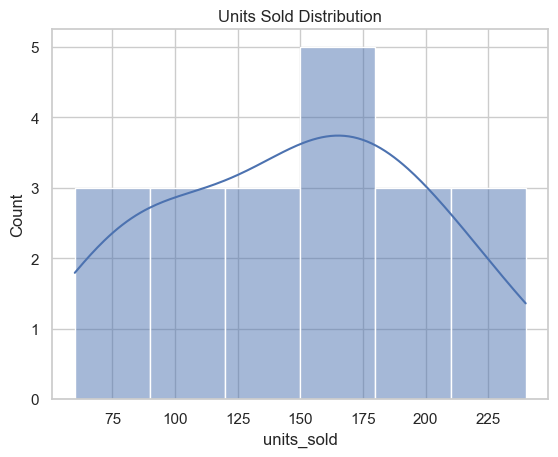

In [5]:
sns.histplot(df['units_sold'], kde=True)
plt.title("Units Sold Distribution")
plt.show()


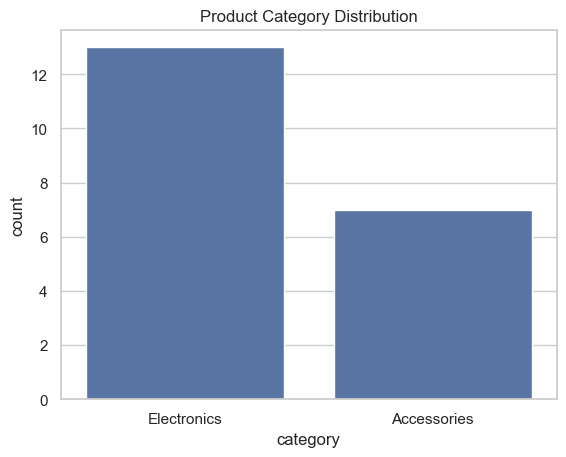

In [6]:
sns.countplot(x='category', data=df)
plt.title("Product Category Distribution")
plt.show()


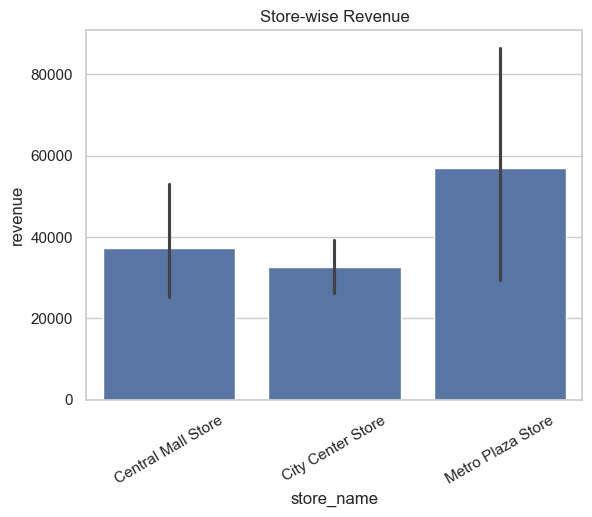

In [7]:
# BIVARIATE & MULTIVARIATE ANALYSIS

sns.barplot(x='store_name', y='revenue', data=df)
plt.xticks(rotation=30)
plt.title("Store-wise Revenue")
plt.show()


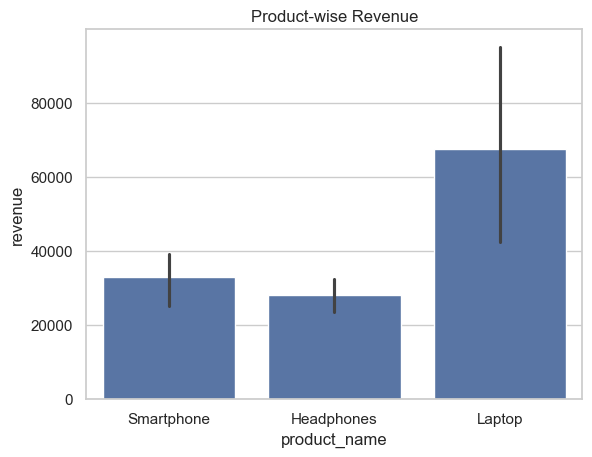

In [8]:
sns.barplot(x='product_name', y='revenue', data=df)
plt.title("Product-wise Revenue")
plt.show()


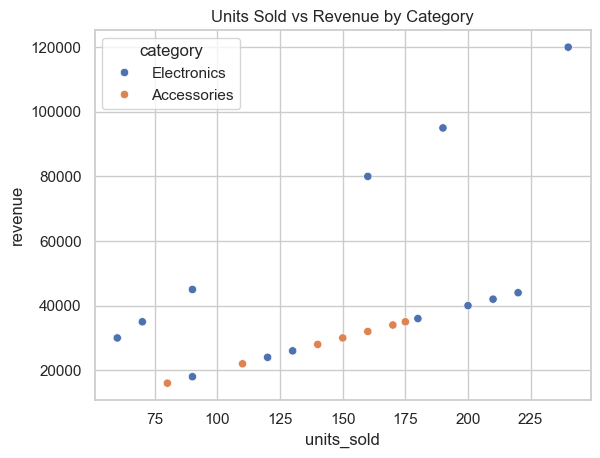

In [9]:
sns.scatterplot(
    x='units_sold',
    y='revenue',
    hue='category',
    data=df
)
plt.title("Units Sold vs Revenue by Category")
plt.show()


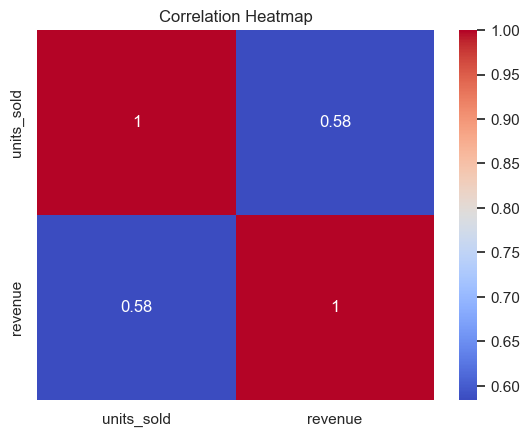

In [10]:
corr = df[['units_sold', 'revenue']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [11]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')


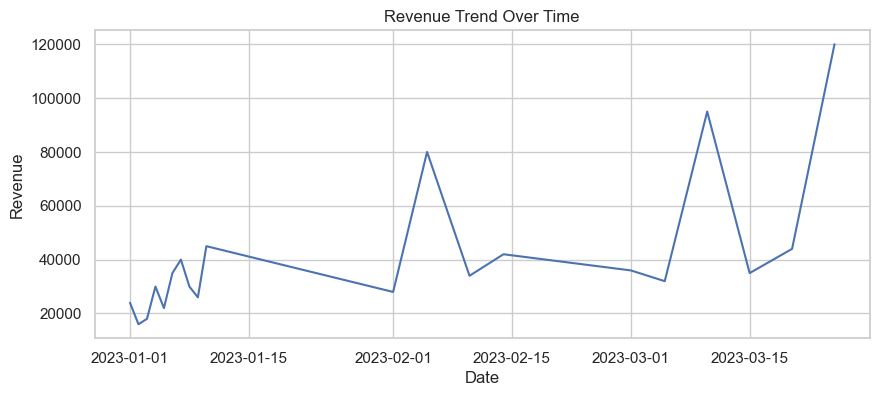

In [12]:
plt.figure(figsize=(10,4))
plt.plot(df['date'], df['revenue'])
plt.title("Revenue Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


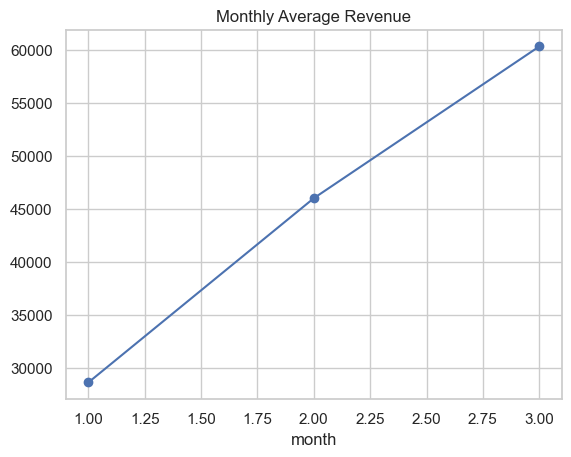

In [13]:
df['month'] = df['date'].dt.month

df.groupby('month')['revenue'].mean().plot(marker='o')
plt.title("Monthly Average Revenue")
plt.show()


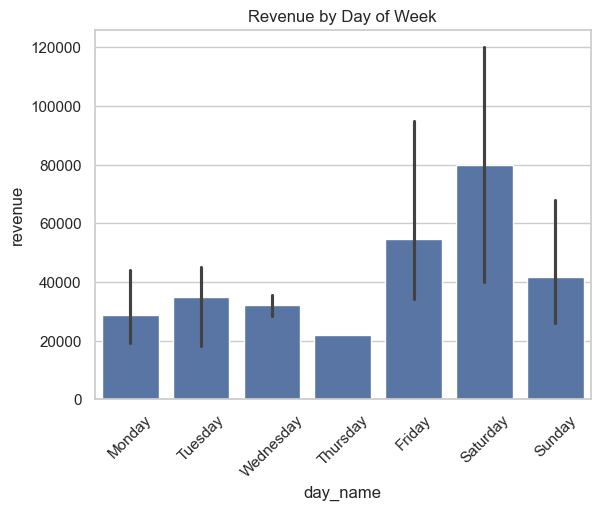

In [14]:
df['day_name'] = df['date'].dt.day_name()

sns.barplot(
    x='day_name',
    y='revenue',
    data=df,
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
plt.xticks(rotation=45)
plt.title("Revenue by Day of Week")
plt.show()


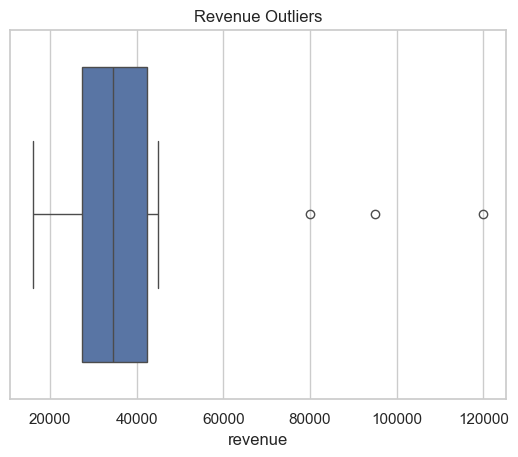

In [15]:
sns.boxplot(x=df['revenue'])
plt.title("Revenue Outliers")
plt.show()
